# Modéle linéaire: statsmodels, sklearn et sympy

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

# Statsmodels et moindre carrés
ATTENTION: pour utiliser la syntaxe de type "R" en statsmodel, il faut patsy version > '0.5.1'
ce que l'on peut tester avec 

In [1]:
import patsy
patsy.__version__

'0.5.1'

In [2]:
# Utiliser 'pip install download' (en ligne de commande) si besoin sur votre machine
from download import download

import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t 


In [3]:
%matplotlib notebook

In [4]:
url = "http://josephsalmon.eu/enseignement/datasets/arbres.txt"
path_target = "./arbres.txt"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./arbres.txt'

In [5]:
df_arbres = pd.read_csv("arbres.txt",sep=' ')
df_arbres.columns

Index(['vol', 'aire'], dtype='object')

Aide disponible ici pour le package statsmodels (avec la syntaxe de R):
http://www.statsmodels.org/devel/example_formulas.html

In [6]:
results = smf.ols('vol ~ aire', data=df_arbres).fit()
results.summary()

/home/jo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    vol   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     257.2
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           2.29e-07
Time:                        10:34:27   Log-Likelihood:                 27.418
No. Observations:                  10   AIC:                            -50.84
Df Residuals:                       8   BIC:                            -50.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.017      0.305      0.768      -0.034       0.045
aire           0.0005   3.06e-05     16.039      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   2.424
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.331
Skew:                          -0.343   Prob(JB):                        0.847
Kurtosis:                       2.431   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
results.params

Intercept    0.005233
aire         0.000491
dtype: float64

In [8]:
xlim = [0, 900]
ylim = [0, 0.5]
df_out_of_sample = pd.DataFrame(columns=["aire"], data=np.arange(0.9*df_arbres['aire'].min(),
                                                                 1.1 * df_arbres['aire'].max(), step=10))

<IPython.core.display.Javascript object>


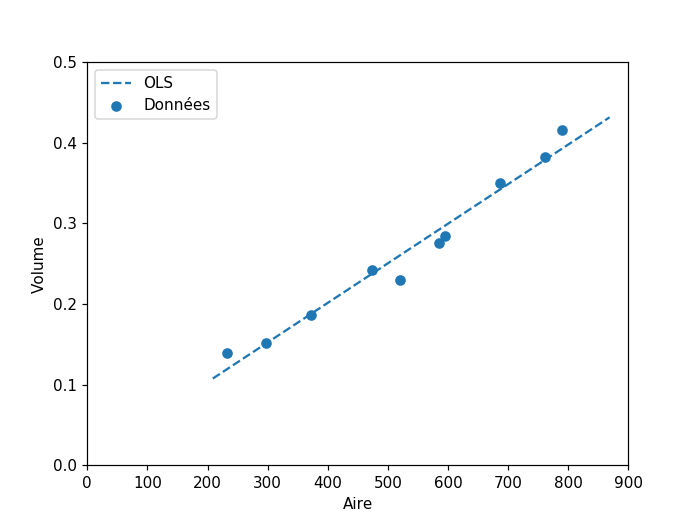

In [9]:
plt.figure()
plt.scatter(df_arbres['aire'], df_arbres['vol'], label='Données')
plt.xlabel('Aire')
plt.ylabel('Volume')
plt.plot(df_out_of_sample, results.predict(df_out_of_sample), '--', label='OLS')
plt.xlim(xlim)
plt.ylim(ylim)

plt.legend();

In [10]:
predictions = results.get_prediction(df_out_of_sample)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.107714,0.011305,0.081644,0.133783,0.059791,0.155636
1,0.112622,0.011039,0.087166,0.138078,0.065030,0.160213
2,0.117530,0.010775,0.092683,0.142377,0.070261,0.164799
3,0.122438,0.010513,0.098195,0.146681,0.075484,0.169392
4,0.127346,0.010254,0.103701,0.150992,0.080698,0.173995
5,0.132254,0.009997,0.109201,0.155308,0.085903,0.178605
6,0.137162,0.009743,0.114694,0.159631,0.091099,0.183225
7,0.142070,0.009493,0.120180,0.163961,0.096287,0.187854
8,0.146979,0.009245,0.125659,0.168298,0.101465,0.192492
9,0.151887,0.009002,0.131129,0.172644,0.106633,0.197140


In [11]:
alpha=0.05
df_predictions = predictions.summary_frame(alpha=alpha)

In [12]:
# Computing prediction interval by hand:
n_samples, _ = df_arbres.shape
t_alpha = t.ppf(1 - alpha / 2, n_samples - 2)
sigmahat = np.sqrt(np.sum(results.resid ** 2) / (n_samples - 2))
meanX = (np.array(df_arbres['aire'].mean(axis=0), dtype=pd.Series))
varX = (np.array(df_arbres['aire'].var(axis=0), dtype=pd.Series))
sigmapred_hat = (sigmahat**2 * (varX +
                                (df_out_of_sample['aire'] - meanX)**2) / (varX * n_samples))
sigmapred_hat = sigmapred_hat ** 0.5
IC_down = results.predict(df_out_of_sample['aire']) - t_alpha * sigmapred_hat
IC_up = results.predict(df_out_of_sample['aire']) + t_alpha * sigmapred_hat

<IPython.core.display.Javascript object>


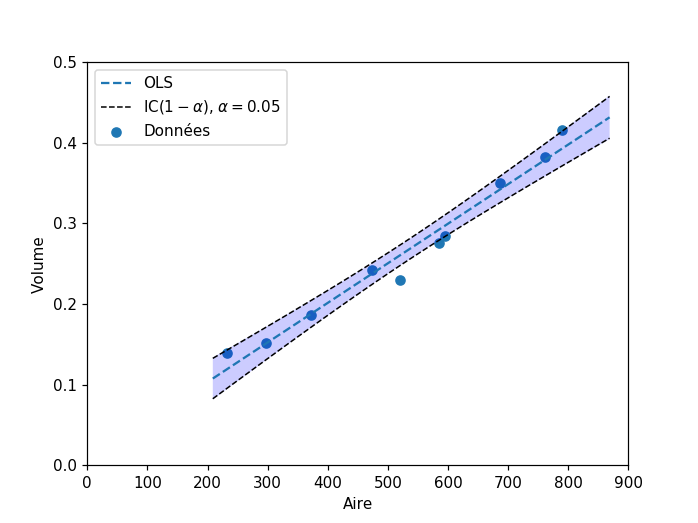

In [13]:
plt.figure()
plt.scatter(df_arbres['aire'], df_arbres['vol'], label='Données')
plt.xlabel('Aire')
plt.ylabel('Volume')
plt.plot(df_out_of_sample, results.predict(df_out_of_sample), '--', label='OLS')

plt.plot(df_out_of_sample, IC_down,'--',color='k',  linewidth=1,
        label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
plt.plot(df_out_of_sample, IC_up,'--',color='k', linewidth=1, label='')

ax = plt.gca()

# Computing prediction interval using statmodels:

ax.fill_between(df_out_of_sample.squeeze(),
                df_predictions['mean_ci_upper'].astype(float),
                df_predictions['mean_ci_lower'].astype(float), facecolor='blue', alpha=.2)


plt.xlim(xlim)
plt.ylim(ylim)

plt.legend();

# `sklearn`: another least squares syntax 

In [14]:
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
# ATTENTION: sklearn a besoin d'une matrice de taille n x p (p ne peut pas être 0)
skl_linmod.fit(df_arbres[['aire']], df_arbres['vol'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<IPython.core.display.Javascript object>


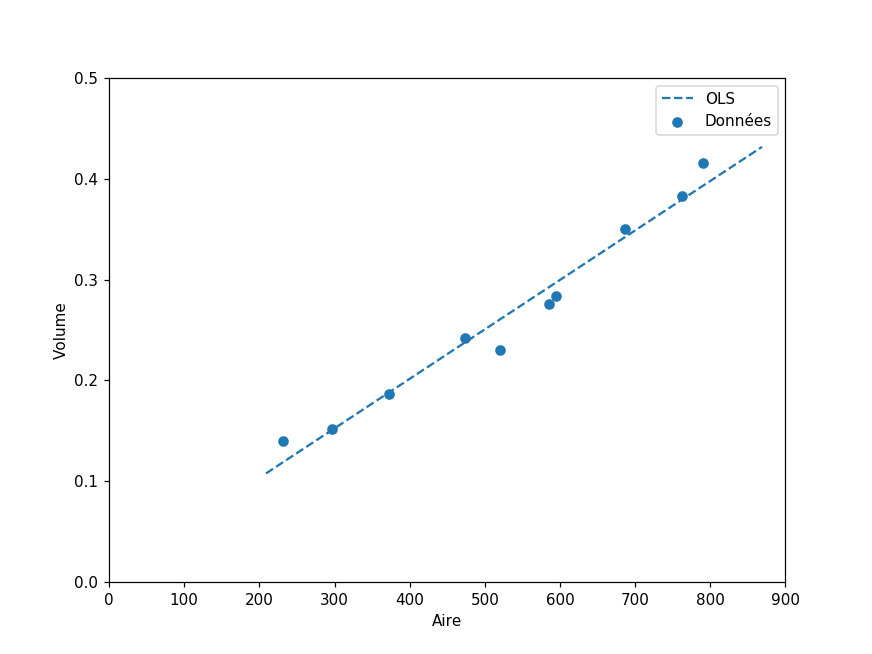

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df_arbres['aire'], df_arbres['vol'], label='Données')
plt.xlabel('Aire')
plt.ylabel('Volume')
plt.xlim([0, 900])
plt.ylim([0, 0.5])
plt.plot(df_out_of_sample, skl_linmod.predict(df_out_of_sample), '--', label='OLS')
plt.legend();

# Anova et calcul symbolique: forme de la matrice $(X^\top X)^{-1}$

In [16]:
import sympy as sym

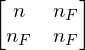

In [17]:
sym.init_printing()

nF, nM, n = sym.symbols('n_F n_M n')
matrix = sym.Matrix([[n, nF],
                     [nF, nF]])
matrix

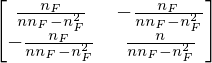

In [18]:
sol = matrix.inv()
sol

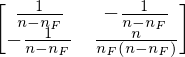

In [19]:
sol=sym.simplify(sol)
sol

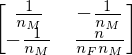

In [20]:
new_sol = sol.subs(n - nF, nM)
new_sol

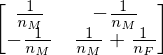

In [21]:
new_sol = sol.subs(n, nM + nF)
XTXinv = new_sol.expand()
XTXinv

# Cas muli-modalités de l'anova:

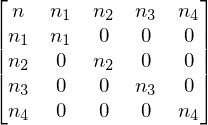

In [22]:
n0, n1, n2, n3, n4, n = sym.symbols('n0 n1 n2 n3 n4 n')
matrix4 = sym.Matrix([[n, n1, n2, n3, n4],
                      [n1, n1, 0, 0, 0],
                      [n2, 0, n2, 0, 0],
                      [n3, 0, 0, n3, 0],
                      [n4, 0, 0, 0, n4]]
                     )
matrix4

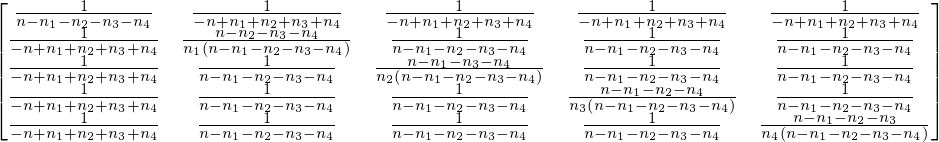

In [23]:
sol4 = sym.simplify(matrix4.inv())
sol4

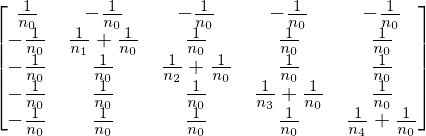

In [24]:
new_sol4 = sol4.subs(n, n0 + n1 + n2 + n3 + n4)
new_sol4.expand()